In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
uber_data = pd.read_csv('Uber Request Data.csv')
print(uber_data.shape)

(6745, 6)


In [3]:
print(uber_data.columns)


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


In [4]:
uber_data.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
uber_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
#Converting Request_timestamp and drop_timestamp to uniform datetime format

uber_data["Request timestamp"] = uber_data["Request timestamp"].apply(lambda x: pd.to_datetime(x))

uber_data["Drop timestamp"] = uber_data["Drop timestamp"].apply(lambda x: pd.to_datetime(x))

In [7]:
uber_data.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [8]:
#Check for null values
uber_data.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
uber_data.Status.value_counts()


Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [10]:
#Extract the hour from requested timestamp
uber_data["Request hour"] = uber_data["Request timestamp"].dt.hour
uber_data.head(5)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


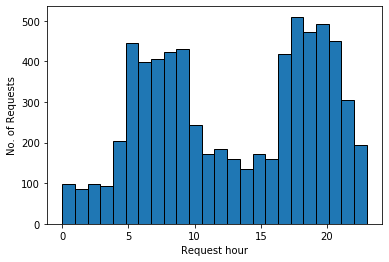

In [11]:
plt.hist(uber_data["Request hour"],edgecolor='black',bins=24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()

Session details
1) EARLY MORNING = Midnight to 5AM

2) MORNING = 5AM to 10AM

3) DAY  = 10AM to 5PM

4) EVENING = 5PM to 10PM

5) LATE NIGHT = 10PM TO Midnight

In [12]:
#Divide the time of the day into five categories
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

In [13]:
uber_data['Time slot'] = uber_data['Request hour'].apply(lambda x: time_period(x))
uber_data.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


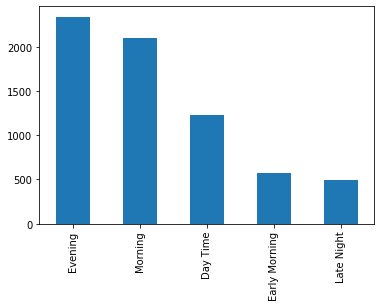

In [14]:
uber_data['Time slot'].value_counts().plot.bar()
plt.show()


comment:
As we can see in above plot, the demand is more in the evening hours

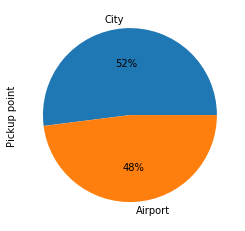

In [19]:
uber_data["Pickup point"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

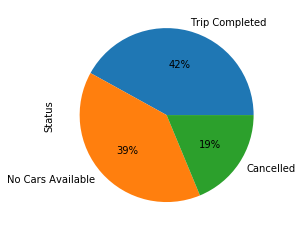

In [20]:
uber_data["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

Comment:
From the above plot you can see, nearly 60% of the requests are either cancelled by the drivers (or) on wait due to the unavailabilty of cars

